In [33]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [35]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [36]:
X, y = mnist['data'], mnist['target']
X = X[:60000]
y = y[:60000]

In [37]:
X.shape

(60000, 784)

In [38]:
y.shape

(60000,)

In [39]:
print(mnist.DESCR)

mldata.org dataset: mnist-original


In [40]:
index = []
for num in range(0, 10):
    index.append([100000, 0])
    for i in range(60000):
        digit = y[i];
        if(digit == num):
            index[-1][0] = min(index[-1][0], i)
            index[-1][1] = max(index[-1][1], i)
index

[[0, 5922],
 [5923, 12664],
 [12665, 18622],
 [18623, 24753],
 [24754, 30595],
 [30596, 36016],
 [36017, 41934],
 [41935, 48199],
 [48200, 54050],
 [54051, 59999]]

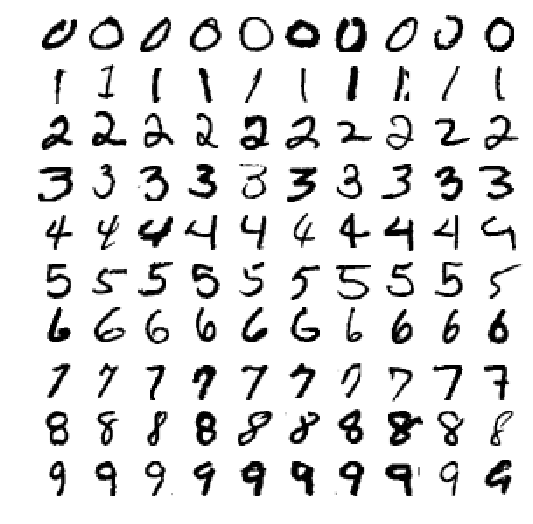

In [41]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
np.random.seed(666)

random_indexes = np.random.permutation(index[0][1])
example_images = np.array(X[random_indexes[:10]])
for i in range(1, 10):
    random_indexes = np.random.permutation(index[i][1]-index[i][0])+index[i][0]
    example_images = np.vstack([example_images, X[random_indexes[:10]]])

plot_digits(example_images, images_per_row=10)
plt.show()

In [43]:
np.max(X)

255

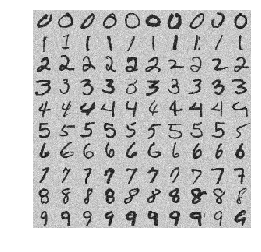

In [57]:
np.random.seed(42)
noisy = np.random.normal(example_images, 20)
plot_digits(noisy, images_per_row=10)
plt.show()

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

10

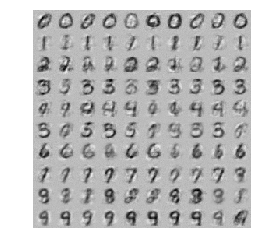

In [60]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered, images_per_row=10)
plt.show()

In [72]:
from sklearn import datasets

digits = datasets.load_digits()

In [73]:
X = digits.data
y = digits.target

In [74]:
indexes = np.argsort(y)

In [75]:
X = X[indexes]
y = y[indexes]

In [76]:
index = []
for num in range(0, 10):
    index.append([100000, 0])
    for i in range(len(y)):
        digit = y[i];
        if(digit == num):
            index[-1][0] = min(index[-1][0], i)
            index[-1][1] = max(index[-1][1], i)
index

[[0, 177],
 [178, 359],
 [360, 536],
 [537, 719],
 [720, 900],
 [901, 1082],
 [1083, 1263],
 [1264, 1442],
 [1443, 1616],
 [1617, 1796]]

In [80]:
np.random.seed(666)

random_indexes = np.random.permutation(index[0][1])
example_images = np.array(X[random_indexes[:10]])
for i in range(1, 10):
    random_indexes = np.random.permutation(index[i][1]-index[i][0])+index[i][0]
    example_images = np.vstack([example_images, X[random_indexes[:10]]])

def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

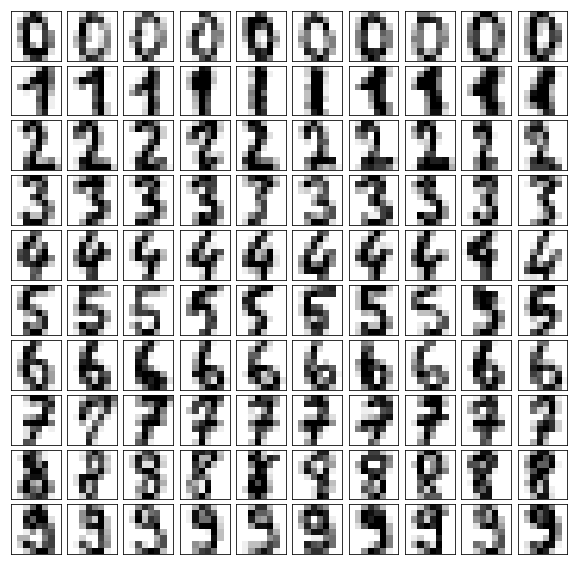

In [81]:
plot_digits(example_images)
plt.show()

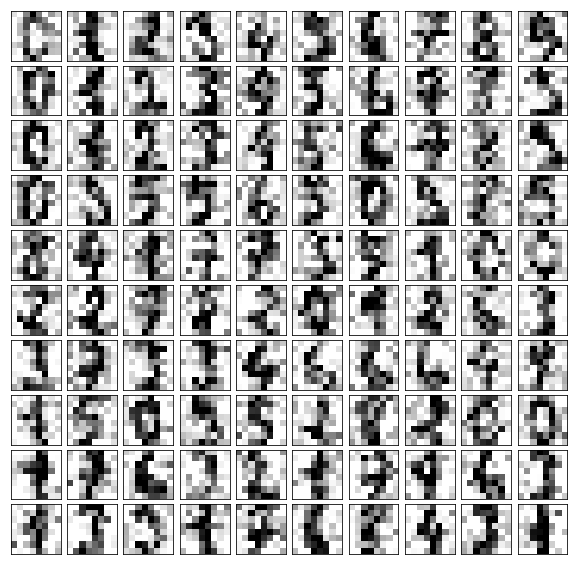

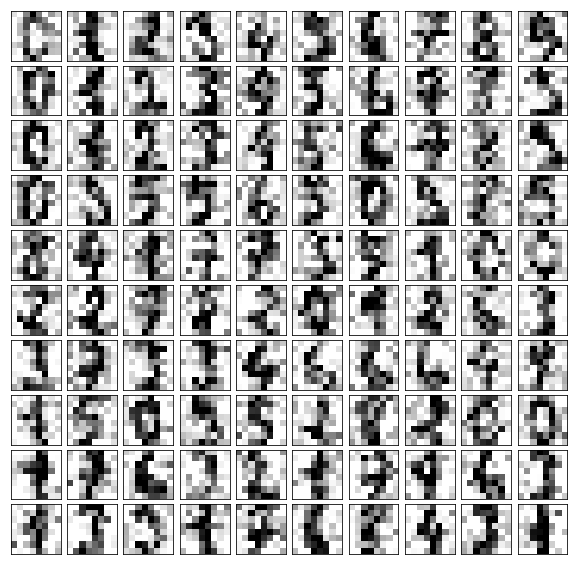

In [83]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)
plt.show()

In [84]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

In [85]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

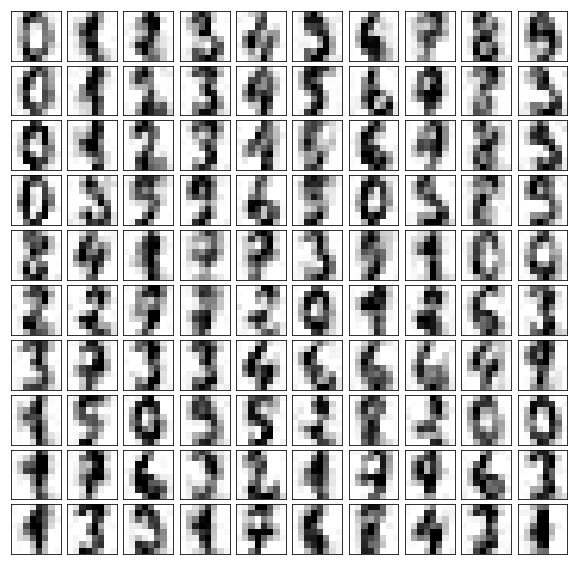

In [86]:
plt.show()